## Analysis of Apple mobility data during COVID19 pandemic
## Aggregated requests for directions in Apple Maps for countries, regions and a selection of cities around the world

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
%matplotlib inline

In [3]:
# Downlad current Apple mobility data from https://www.apple.com/covid19/mobility
# Load data into dataframe
df = pd.read_csv('applemobilitytrends-2020-05-31.csv')

In [4]:
df.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,65.34,56.11,53.39,73.94,66.27,65.59,66.11,67.85,67.47,68.61
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,68.49,48.02,42.56,74.97,70.66,65.67,67.16,69.89,56.67,59.53
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,47.52,41.34,23.81,28.11,40.86,42.91,43.77,48.26,40.39,23.77
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,31.99,31.40,16.83,21.37,30.85,33.27,32.63,34.67,28.70,17.40
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,82.51,65.78,74.12,77.10,79.92,82.65,88.37,92.70,73.04,78.07


In [5]:
# The data are categorised by three direction types
df['transportation_type'].unique()

array(['driving', 'walking', 'transit'], dtype=object)

In [6]:
# Which countries, cities and regions does the data comprise?
df['region'].unique()

array(['Albania', 'Argentina', 'Australia', ..., 'Young County',
       'Yuba County', 'Yuma County'], dtype=object)

In [7]:
# How many countries, cities and regions does the data comprise?
df['region'].nunique()

2325

# Plot walking activity for several selected cities

In [15]:
# Create list with cities of interest
cities = ['Cologne', 'Cape Town', 'London', 'Rio de Janeiro', 'Saint Petersburg - Russia', 'Tokyo']
# Subset df for a selection of cities
df_sub = df[df['region'].isin(cities)].reset_index(drop=True)
# Remove geo_type column
del df_sub['geo_type']

In [16]:
df_sub.head()

,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,...,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31
0,Cape Town,driving,NaN,Western Cape,South Africa,100.0,103.48,102.96,105.30,101.37,...,43.63,35.08,32.37,37.77,41.85,42.45,40.50,47.37,40.03,34.68
1,Cape Town,walking,NaN,Western Cape,South Africa,100.0,103.53,100.79,104.95,100.12,...,39.80,35.33,56.40,50.28,49.19,44.77,40.83,43.95,42.74,30.53
2,Cologne,driving,Köln,North Rhine-Westphalia,Germany,100.0,94.81,95.04,97.11,107.21,...,78.72,74.53,68.39,79.05,81.90,84.79,87.07,98.01,92.42,74.05
3,Cologne,transit,Köln,North Rhine-Westphalia,Germany,100.0,99.91,96.18,97.26,111.85,...,81.34,81.37,79.30,84.38,87.82,93.31,94.95,100.79,100.23,81.99
4,Cologne,walking,Köln,North Rhine-Westphalia,Germany,100.0,105.98,106.25,115.44,134.22,...,77.87,82.16,50.22,68.58,74.64,76.75,80.50,91.71,114.57,71.86


In [28]:
# Select all rows with transporation type driving
df_walk = df_sub[df_sub['transportation_type'] == 'walking']
# Delete transportation_type column
del df_walk['transportation_type']
# Delete alternative name column
del df_walk['alternative_name']
# Delete sub-region column
del df_walk['sub-region']
# Delete country column
del df_walk['country']
# Set index to region column
df_walk.set_index(['region'], inplace=True)
# Remove index name
df_walk.rename_axis(None, inplace=True)
df_walk.head(20)

,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,...,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31
Cape Town,100.0,103.53,100.79,104.95,100.12,92.99,80.45,106.27,109.66,111.07,...,39.80,35.33,56.40,50.28,49.19,44.77,40.83,43.95,42.74,30.53
Cologne,100.0,105.98,106.25,115.44,134.22,178.12,84.19,92.34,98.18,95.55,...,77.87,82.16,50.22,68.58,74.64,76.75,80.50,91.71,114.57,71.86
London,100.0,108.89,116.84,118.82,132.18,160.29,105.12,108.02,120.52,124.81,...,42.71,43.69,44.90,51.69,44.11,43.93,45.73,49.30,58.30,48.50
Rio de Janeiro,100.0,105.01,105.56,98.62,96.15,94.55,70.90,72.90,105.73,105.46,...,32.62,30.70,19.06,29.89,28.68,30.97,31.89,35.62,34.60,23.48
Saint Petersburg - Russia,100.0,103.53,97.82,97.67,118.10,120.06,107.92,103.98,112.43,107.91,...,58.46,62.95,63.50,72.59,74.61,75.26,63.14,75.08,72.64,62.14
Tokyo,100.0,95.46,102.60,108.34,122.61,138.95,105.21,102.03,103.92,96.62,...,67.57,81.24,67.02,61.93,62.86,68.98,68.70,87.41,84.17,66.37


In [29]:
# Transpose df to have cities as columns
driv_trps = df_walk.T
driv_trps.head()

,Cape Town,Cologne,London,Rio de Janeiro,Saint Petersburg - Russia,Tokyo
2020-01-13,100.00,100.00,100.00,100.00,100.00,100.00
2020-01-14,103.53,105.98,108.89,105.01,103.53,95.46
2020-01-15,100.79,106.25,116.84,105.56,97.82,102.60
2020-01-16,104.95,115.44,118.82,98.62,97.67,108.34
2020-01-17,100.12,134.22,132.18,96.15,118.10,122.61


In [30]:
# Create dic with country color associations for plotting
# Get country names from df columns
cities = list(driv_trps.columns)
# Create list with color names
color_list = ['deepskyblue', 'firebrick', 'lightsteelblue', 'mediumorchid', 'goldenrod', 'seagreen']
# Combine countries and colors to dic
colors = dict(zip(cities, color_list))
print(colors)

{'Cape Town': 'deepskyblue', 'Cologne': 'firebrick', 'London': 'lightsteelblue', 'Rio de Janeiro': 'mediumorchid', 'Saint Petersburg - Russia': 'goldenrod', 'Tokyo': 'seagreen'}


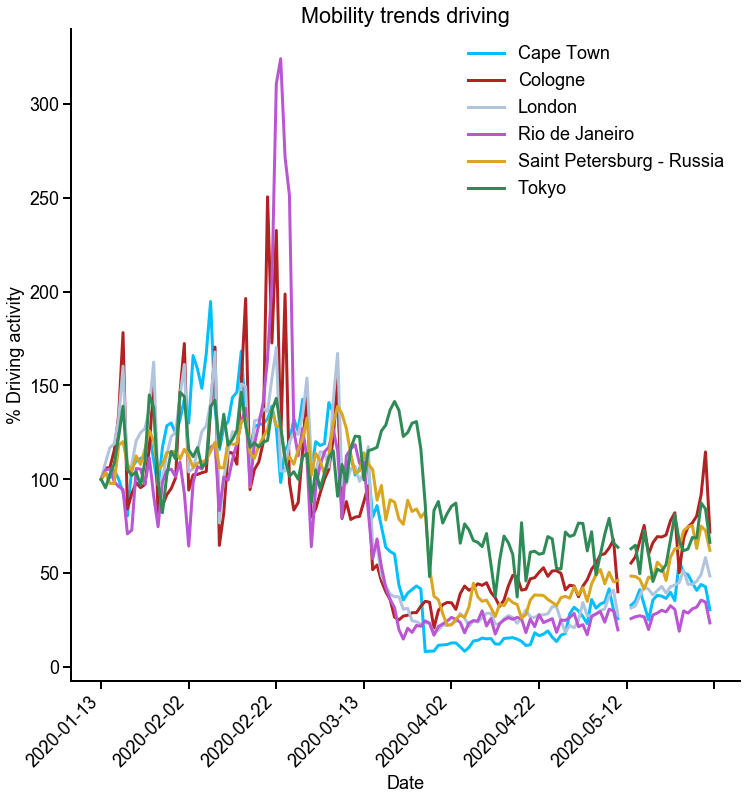

In [31]:
# Plot driving activity across several cities
rcParams['figure.figsize'] = 12, 12
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 18
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Arial'
rcParams['xtick.major.size'] = 8
rcParams['ytick.major.size'] = 8
rcParams['xtick.major.width'] = 2
rcParams['ytick.major.width'] = 2
rcParams['xtick.minor.size'] = 4
rcParams['ytick.minor.size'] = 4
rcParams['xtick.minor.width'] = 1
rcParams['ytick.minor.width'] = 1
rcParams['axes.spines.right'] = 'False'
rcParams['axes.spines.top'] = 'False'
rcParams['axes.grid'] = 'False'	

ax = driv_trps.plot(linewidth=3, color = list(colors.values()))
ax.legend(list(driv_trps.columns), loc = 'upper right', bbox_to_anchor = (1.2,1.025))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
ax.set_xlabel('Date')
ax.set_ylabel('% Driving activity')
plt.title('Mobility trends driving')
plt.legend(frameon=False)
plt.show()

In mid February there is increased traffic in Rio and Cologne due to carneval session (21-26/02/20). It is also apparent that the lockdown started later in Japan (17/04/20) and Russia (30/03/20)

# Plot activity for all three types of transportation in Seattle

In [45]:
# Subset df for Seattle
df_sub = df[df['region'] == 'Seattle'].reset_index(drop=True)
# Remove column not required
del df_sub['geo_type']
del df_sub['region']
del df_sub['alternative_name']
del df_sub['sub-region']
del df_sub['country']

In [46]:
df_sub.head()

,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,...,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31
0,driving,100.0,91.43,105.28,128.93,150.42,141.85,108.22,123.71,145.34,...,115.62,105.36,91.17,78.55,100.30,107.78,109.49,125.05,99.07,86.27
1,transit,100.0,96.87,91.73,98.76,101.14,87.91,74.18,85.34,96.40,...,21.71,20.75,19.92,19.45,24.30,25.16,24.79,25.85,22.61,20.83
2,walking,100.0,101.74,100.47,125.25,150.39,174.37,132.22,122.04,115.95,...,84.35,82.13,74.97,58.86,77.31,86.57,85.10,97.71,86.00,69.96


In [47]:
# Set index to regiotransportation type column
df_sub.set_index(['transportation_type'], inplace=True)
# Remove index name
df_sub.rename_axis(None, inplace=True)
df_sub.head()

,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,...,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31
driving,100.0,91.43,105.28,128.93,150.42,141.85,108.22,123.71,145.34,149.76,...,115.62,105.36,91.17,78.55,100.30,107.78,109.49,125.05,99.07,86.27
transit,100.0,96.87,91.73,98.76,101.14,87.91,74.18,85.34,96.40,101.00,...,21.71,20.75,19.92,19.45,24.30,25.16,24.79,25.85,22.61,20.83
walking,100.0,101.74,100.47,125.25,150.39,174.37,132.22,122.04,115.95,126.74,...,84.35,82.13,74.97,58.86,77.31,86.57,85.10,97.71,86.00,69.96


In [48]:
# Transpose df to have transportation type as columns
df_trps = df_sub.T
df_trps.head()

,driving,transit,walking
2020-01-13,100.00,100.00,100.00
2020-01-14,91.43,96.87,101.74
2020-01-15,105.28,91.73,100.47
2020-01-16,128.93,98.76,125.25
2020-01-17,150.42,101.14,150.39


In [49]:
# Create dic with transportation type color associations for plotting
# Get country names from df columns
transport_type = list(df_trps.columns)
# Create list with color names
color_list = ['deepskyblue', 'firebrick', 'darkolivegreen']
# Combine countries and colors to dic
colors = dict(zip(transport_type, color_list))
print(colors)

{'driving': 'deepskyblue', 'transit': 'firebrick', 'walking': 'darkolivegreen'}


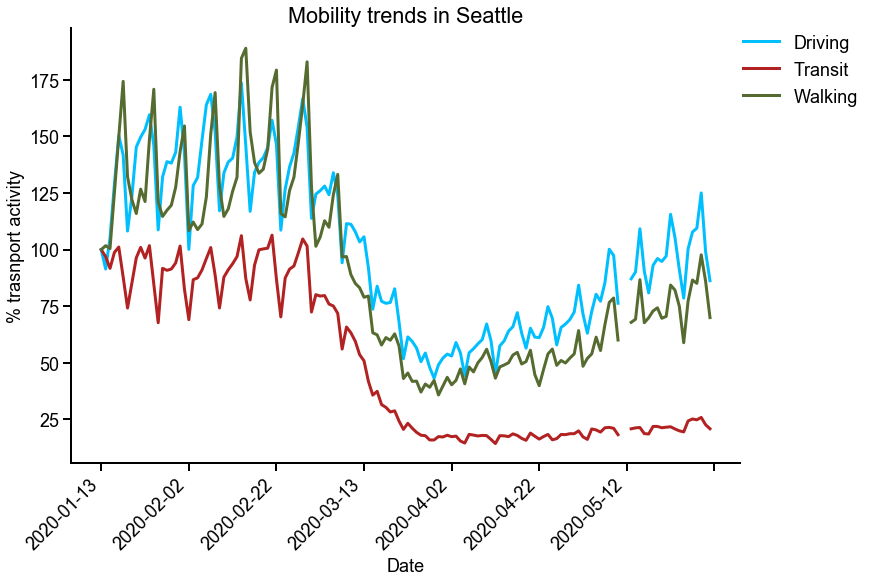

In [58]:
# Plot transportation types in Seattle
rcParams['figure.figsize'] = 12, 8
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 18
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Arial'
rcParams['xtick.major.size'] = 8
rcParams['ytick.major.size'] = 8
rcParams['xtick.major.width'] = 2
rcParams['ytick.major.width'] = 2
rcParams['xtick.minor.size'] = 4
rcParams['ytick.minor.size'] = 4
rcParams['xtick.minor.width'] = 1
rcParams['ytick.minor.width'] = 1
rcParams['axes.spines.right'] = 'False'
rcParams['axes.spines.top'] = 'False'
rcParams['axes.grid'] = 'False'	
# Legend labels
label_txt = ['Driving', 'Transit', 'Walking']
# Select columns to plot
df_sel = df_trps.iloc[:, 0:3].copy()
ax = df_sel.plot(linewidth=3, color = list(colors.values()))
ax.legend(labels = label_txt, loc = 'upper right', bbox_to_anchor = (1.2,1.025), frameon=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
ax.set_xlabel('Date')
ax.set_ylabel('% trasnport activity')
plt.title('Mobility trends in Seattle')
plt.show()

The transit activity is much lower compared to driving and walking. This could be due to the way Apple has prepared the data. The activity levels are normalised to the activity recorded on 13th January. If the transit activity was unusually high on that day while walking and driving activities were unusually low it would make the subsequent activity levels appear artificially lower (for transit) and higher (for walking and driving), respectively. To test this hypothesis I'm going to normalise all activity levels to the average activity levels from the first 28 days of data recording before the start of social distancing.

In [51]:
# Create list with mobility types to iterate over
mobility_type = list(df_trps.columns)
mobility_type

['driving', 'transit', 'walking']

In [52]:
# Create dic with average over the first four weeks for each mobility type
norm_28d = {x: np.mean(df_trps.iloc[:28, i]) for i, x in enumerate(mobility_type)}
norm_28d

{'driving': 135.02107142857142,
 'transit': 90.36964285714285,
 'walking': 128.5992857142857}

In [53]:
# Function to which the original mobility columns are passed as an argument. A dictionary comprehension normalises each row to the average of the first four weeks for the respective mobility type. The dictionary comprehension is then transformed to a pandas series and returned.
def process(row):
    return pd.Series({x + '_scaled': row[x]/norm_28d[x]*100 for x in mobility_type})

In [54]:
# Add new columns with rescaled data to average from first four weeks
scale_df = df_trps.join(df_trps.apply(process, axis="columns"))
scale_df.head()

,driving,transit,walking,driving_scaled,transit_scaled,walking_scaled
2020-01-13,100.00,100.00,100.00,74.062514,110.656629,77.760930
2020-01-14,91.43,96.87,101.74,67.715357,107.193076,79.113970
2020-01-15,105.28,91.73,100.47,77.973015,101.505325,78.126406
2020-01-16,128.93,98.76,125.25,95.488799,109.284486,97.395564
2020-01-17,150.42,101.14,150.39,111.404834,111.918114,116.944662


In [55]:
# Select columns to plot
df_sel = scale_df.iloc[:, 3:6].copy()

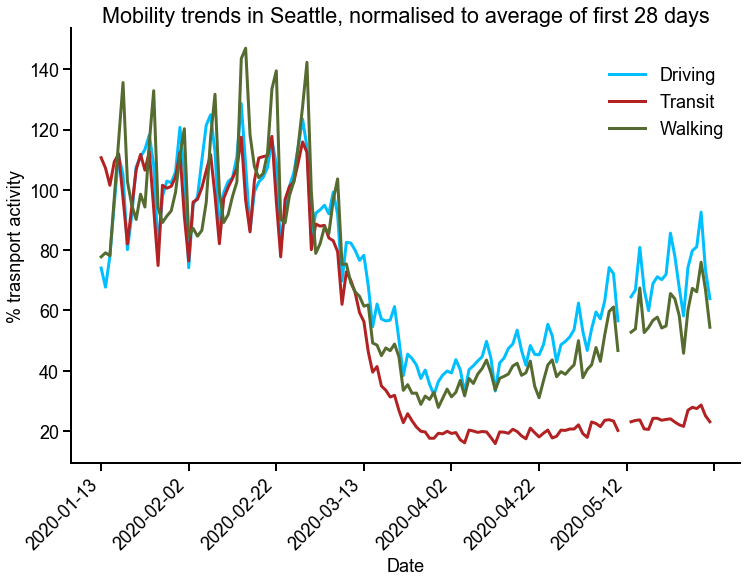

In [56]:
# Plot noormalised transpostation in Seattle
rcParams['figure.figsize'] = 12, 8
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 18
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Arial'
rcParams['xtick.major.size'] = 8
rcParams['ytick.major.size'] = 8
rcParams['xtick.major.width'] = 2
rcParams['ytick.major.width'] = 2
rcParams['xtick.minor.size'] = 4
rcParams['ytick.minor.size'] = 4
rcParams['xtick.minor.width'] = 1
rcParams['ytick.minor.width'] = 1
rcParams['axes.spines.right'] = 'False'
rcParams['axes.spines.top'] = 'False'
rcParams['axes.grid'] = 'False'	

label_txt = ['Driving', 'Transit', 'Walking']

ax = df_sel.plot(linewidth=3, color = list(colors.values()))
ax.legend(labels = label_txt, loc = 'upper right', bbox_to_anchor = (1,0.95), frameon=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
ax.set_xlabel('Date')
ax.set_ylabel('% trasnport activity')
plt.title('Mobility trends in Seattle, normalised to average of first 28 days')

plt.show()

After normalisation the levels of all activity types are roughly in sync and cycle around 100% until social distancing starts. Thus, using the levels measured on 13th January distorted the differences between transit activity and the other mobility activities in Seattle.